# Lecture 41 - Manifold Learning: MDS & ISOMAP

# Review of PCA

PCA is an **unsupervised** model that can be used to:

1. Perform Dimensionality Reduction, by projecting data into directions with maximum explained variance
2. Uncorrelate Data, by rotating the data space such that data becomes uncorrelated

PCA uses **linear transformations** (projections or rotations) of the input data $X$:

$$Y=AX$$

where $A$ is a $D\times D$ linear transformation matrix, $X$ is an $D\times N$ data matrix, and $Y$ is a $D\times N$ transformed data matrix.

Therefore PCA will work well when the relationship between features are linear. Moreover, PCA is unsupervised because it **does not** use the class labels to find vector projections (or rotations). So the projections may not necessarily be in the direction that maximize class separability.

PCA can be formulated from two points-of-view:
1. Maximum explained variance
2. Minimum reconstruction error

## Steps of PCA

Consider the data $X$:

1. Subtract the mean $\mu = \frac{1}{N}\sum_{i=1}^N x_i$

2. Compute the covariance matrix $R_X$ (by definition, the covariance already subtracts the data's mean)

3. Compute eigenvectors and eigenvalues of the matrix $R_X$, and store the sorted eigenvectors ($e_i$) in decreasing eigenvalue ($\lambda_i$) order.

4. The linear transformation $A$ will be: $A = \left[\begin{array}{c} \mathbf{a_{1}}\\ \mathbf{a_{2}} \end{array}\right]$, where $\lambda_1 > \lambda_2$

5. Projection: $\mathbf{Y}=A\mathbf{X}$

Note that the formal definition of covariance already accounts for demeaning the data.

___

### Example

Consider the scaled data matrix $X$ of size $D\times N$ (where $N$ is the number of samples and $D$ the number of features), with covariance matrix $K$ of size $D\times D$. The eigenvalues of $K$ are $\lambda_1=0.99$, $\lambda_2=0.5$ and $\lambda_3=2$, and the respective eigenvectors are $v_1=\left[\begin{array}{c}-0.99, 0.09,0\end{array}\right]^T$, $v_2=\left[\begin{array}{c}0,0,1\end{array}\right]^T$ and $v_3=\left[\begin{array}{c}0.09,0.99,0\end{array}\right]^T$. Answer the following questions:

1. Suppose $Y$ is the data transformation obtained by principal component transform of $X$ into a 2-dimensional space. Using the information provided, write down the linear transformation matrix $A$, and write down the formula for computing $Y$ from $X$ and $A$. Justify your answer.
2. What is the amount of explained variance of the 2-D projection? Justify your answer.
3. What is the covariance matrix of $Y$? Justify your answer.

___

# Manifold Learning

As we have already noted, many natural sources of data correspond to low-dimensional, possibly noisy, non-linear manifolds embedded within the higher dimensional observed data space. Capturing this property explicitly can lead to improved density modelling compared with more general methods.

PCA and LDA are often used to project a data set onto a lower-dimensional space. However both of then assume that the data samples *live* in an underlying linear manifold.

There are other dimensionality reduction techniques that do not assume the manifold is linear. They include:

1. **Multi-Dimensional Scaling (MDS)**

2. **Isometric Mapping (ISOMAP)**

3. **Locally Linear Embedding (LLE)**

# MultiDimensional Scaling (MDS)

Another linear technique with a similar aim is **multidimensional scaling**, or **MDS**. It finds a low-dimensional projection of the data such as to preserve, as closely as possible, the pairwise distances between data points, and involves finding the eigenvectors of the distance matrix. In the case where the distances are Euclidean, it gives equivalent results to PCA. Therefore, MDS is a generalization of PCA.

Consider a set of mean-centered observations $X=\{x_1,x_2,\dots,x_N\}$ where $x_i\in\mathbb{R}^D$. By mean-centered samples $X$, I mean that $\mu_j = \sum_{i=1}^N x_{ij} = 0, \forall j=1,2,\dots,D$.

Consider the **proximity matrix** $D$ that stores pairwise distances of data points $d_{ij} = \text{distance}(x_i,x_j)$:

$$D = \left[\begin{array}{cccc}
d_{11} & d_{12} & \cdots & d_{1N}\\
d_{21} & d_{22} & \cdots & d_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
d_{N1} & d_{N2} & \cdots & d_{NN}
\end{array}\right]$$

Note that $D$ is an $N\times N$ symmetric matrix.

A proximity matrix is:
* A *metric* if 
    1. $d_{ii}=0$
    2. $d_{ij}\geq 0, i\neq j$
    3. $d_{ij} = d_{ji},\forall i,j$
    4. $d_{ij} \leq d_{ik} + d_{jk},\forall i,j,k$ (triangle inequality).
* *Euclidean* if there exists a configuration of points in Euclidean space with the same $d_{ij}$ values.

Given an assumed Euclidean proximity matrix, $D$, the **goal** of MDS is to find a set of points, $Y$, that have the same proximity matrix in an M-dimensional space, where $M<D$.

Let:

$$B = YY^T = \left[\begin{array}{c} y_{1}\\ y_{2}\\ \vdots\\ y_{N} \end{array}\right]\left[\begin{array}{cccc}
y_{1}^{T} & y_{2}^{T} & \cdots & y_{N}^{T}\end{array}\right]=\left[\begin{array}{cccc}
y_{1}y_{1}^{T} & y_{1}y_{2}^{T} & \cdots & y_{1}y_{N}^{T}\\
y_{2}y_{1}^{T} & y_{2}y_{2}^{T} & \cdots & y_{2}y_{N}^{T}\\
\vdots & \vdots & \ddots & \vdots\\
y_{N}y_{1}^{T} & y_{N}y_{2}^{T} & \cdots & y_{N}y_{N}^{T}
\end{array}\right]$$

Then $$b_{ij} = \sum_{k=1}^M y_{ik}y_{jk}$$

* So, if we want to find $B$, then we can determine $Y$ by taking: 

$$Y\approx B^{1/2}$$

since $B=YY^T$.

* The squared Euclidean distance between points of M-dimensional data $Y$ can be written in terms of $B$:

\begin{align*}
d_{ij}^2 &= (y_i - y_j) (y_i - y_j)^T \\
&= (y_i - y_j) (y_i^T - y_j^T) \\
&= y_iy_i^T - y_iy_j^T -y_jy_i^T + y_jy_j^T \\
&= y_iy_i^T - 2 y_iy_j^T + y_jy_j^T \\
&= b_{ii} - 2 b_{ij} + b_{jj} \\
\end{align*}

* Note that if we *translate* or *rotate* the data, we get the same proximity matrix! 

* Let's add some constraints to our transformed data: constraint data $Y$ to have mean zero for all dimensions, which is to say, $\sum_{i=1}^N y_{ik} = 0, \forall k$.

* This implies that each row and column of $B$ sum to 0. Proof:

$$\sum_{j=1}^N b_{ij} = \sum_{j=1}^N\sum_{k=1}^M y_{ik}y_{jk} = \sum_{k=1}^M y_{ik} \left(\sum_{j=1}^N y_{jk}\right) = 0 \text{ (sum of columns)} $$

$$\sum_{i=1}^N b_{ij} = \sum_{i=1}^N\sum_{k=1}^M y_{jk}y_{ik} = \sum_{k=1}^M y_{ik} \left(\sum_{j=1}^N y_{jk}\right) = 0 \text{ (sum of rows)} $$

Given this, we have:

Summing over the rows:
\begin{align*}
\sum_{i=1}^N d_{ij}^2 &= \sum_{i=1}^N (b_{ii} + b_{jj} - 2b_{ij}) = \sum_{i=1}^N b_{ii} + \sum_{i=1}^N b_{jj} - \sum_{i=1}^N 2b_{ij} = T + Nb_{jj}\\
\iff b_{jj} &= \frac{1}{N}\left(\sum_{i=1}^N d_{ij}^2 - T\right) = \frac{1}{N}\left(\sum_{i=1}^N d_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right)
\end{align*}

Summing over the columns:
\begin{align*}
\sum_{j=1}^N d_{ij}^2 &= \sum_{j=1}^N (b_{ii} + b_{jj} - 2b_{ij}) = \sum_{j=1}^N b_{ii} + \sum_{j=1}^N b_{jj} - \sum_{j=1}^N 2b_{ij} = T + Nb_{ii}\\
\iff b_{ii} &= \frac{1}{N}\left(\sum_{j=1}^N d_{ij}^2 - T\right) = \frac{1}{N}\left(\sum_{j=1}^N d_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right)
\end{align*}

Summing over the rows and columns:
\begin{align*}
\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2 &= \sum_{i=1}^N\sum_{j=1}^N (b_{ii} + b_{jj} - 2b_{ij}) = 2NT \\
\iff T &= \frac{1}{2N} \sum_{i=1}^N\sum_{j=1}^N d_{ij}^2
\end{align*}

where $T = \text{trace}(B) = \sum_{i=1}^N b_{ii}$.


* Coming back to proximity matrix, $D$:
\begin{align*}
d_{ij}^2 &= b_{ii} - 2 b_{ij} + b_{jj} \\
d_{ij}^2 &= \frac{1}{N}\left(\sum_{j=1}^N d_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right) - 2b_{ij} + \frac{1}{N}\left(\sum_{i=1}^N d_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right) \\
2b_{ij} &= -d_{ij}^2 + \frac{1}{N}\sum_{j=1}^N d_{ij}^2 + \frac{1}{N}\sum_{i=1}^N d_{ij}^2 - \frac{1}{N^2}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2 \\
b_{ij} &= -\frac{1}{2} \left(d_{ij}^2 - \frac{1}{N}\sum_{j=1}^N d_{ij}^2 - \frac{1}{N}\sum_{i=1}^N d_{ij}^2 + \frac{1}{N^2}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right)
\end{align*}

* So, now, we can estimate $B$ using the proximity matrix $D$. In a matrix form, we can write:

$$B = -\frac{1}{2} JD^{2}J$$

where $J = I - \frac{1}{N}\mathbf{1}\mathbf{1}^T$, $I$ is an $N\times N$ identity matrix, $\mathbf{1}$ is an $N\times 1$ vector of 1's and $D^{2} = \left[d_{ij}^2\right]$ is the proximity matrix of size $N\times N$.

* Recall that for any real symmetruc matrix $B$, the eigenvalues are real and the eigenvectors can be chosen such that they are orthogonal to each other. Thus a real symmetric matrix $B$ can be described in the eigenspace, as follows:

$$B=V\Lambda V^T$$

where $V$ is an orthogonal matrix containing the eigenvectors of $B$ and $\Lambda$ is a diagonal matrix containing the eigenvalues of $B$.

Then we can estimate $Y$ as follows:

$$Y = B^{1/2} = V\Lambda^{1/2}$$

keeping only the $M$ dimensions of interest ($M<D$) corresponding to the $M$ largest eigenvalues.

* Note: If we use the Euclidean distance to compute $D$ then MDS is equivalent to PCA! However, $D$ can be computed with any metric and therefore, MDS is a generalization of PCA.

### Steps to Implement MDS

The MDS algorithm:

1. Compute the distance/proximity matrix, $D$.
2. Compute $D^2$.
3. Compute $J = I - \frac{1}{N}\mathbf{1}\mathbf{1}^T$
4. Compute $B = -\frac{1}{2} JD^{2}J$
5. Compute eigenvectors, $V$, and eigenvalues,$\Lambda$, of $B$. (store them in a matrix in decreasing eigenvalue order.)
6. Compute $Y = V\Lambda^{1/2}$

___

# Isometric feature Mapping (ISOMAP)

In **Isometric feature Mapping**, or **ISOMAP**, the goal is to project the data to a lower-dimensional space using MDS, but where the distance/dissimilarities are defined in terms of the geodesic distances measured along the manifold.

* *How can we address the same problem when the data does not lie on a linear subspace but rather on a sub-manifold?*

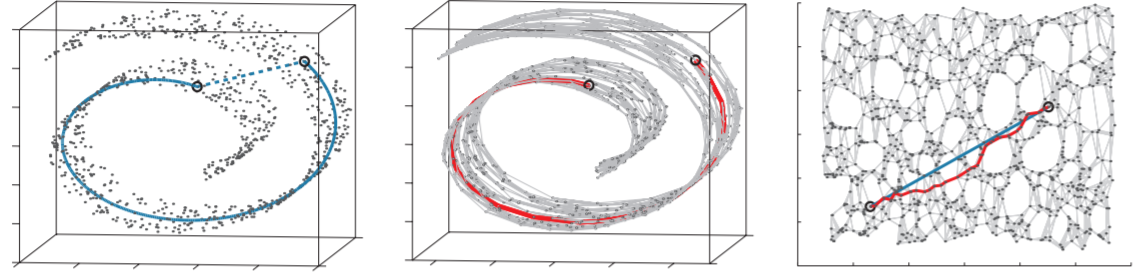

In [5]:
Image('figures/isomap.png', width=900)

ISOMAP was introduced in 2000 in a [Science](https://science.sciencemag.org/content/290/5500/2319/tab-pdf) issue paper and approaches dimensionality reduction for data that lies on a manifold.

* It builds on classical MDS.

* The contribution of ISOMAP is that the proximity matrix, $D$, is constructed using **geodesic distances**.

* Each data point and its neighbors lie on or close to a locally linear patch of the manifold. And, so, each data point can be reconstructed as a weighted sum of its neighbors.

## Steps to Implement ISOMAP

1. **Construct neighborhood graph:** Identify the neighbors of each point on the manifold (e.g., K nearest neighbors, $\epsilon$-ball approach). The edges between neighbors are weighted using their distance in the input space.

2. **Compute shortest paths:** Compute the distance between all pairs of points on the manifold by computing their shortest path distance on the graph created in step 1 (e.g. Floyd-Warshall's algorithm). This will produce the distance matrix $D_G$.

3. **Construct M-dimensional embedding:** Apply classical MDS to the matrix of graph distances computed in step 2

$$B = -\frac{1}{2} J D_G^2 J$$

$$Y = V\Lambda^{1/2}$$

where $V$ and $\Lambda$ are the eigenvectors and eigenvalues of $B$, respectively.

* More details on the mathematical derivations can be found in the original published work ([here](https://science.sciencemag.org/content/290/5500/2319/tab-pdf)).

### Floyd-Warshall Algorithm

The Foyd-Warshall alorithm to compute graph-based distance:

1. Initialize $d_G(i,j) = d_X(i,j)$ if $i,j$ are identified as neighbors. Otherwise, set $d_G(i,j) = \infty$.
    * This means that, if data points are considered neighbors of a particular point, then Euclidean distance between that point and its neighbors is sufficient and assumed to be close enough to the geodesic distance. (Note that this is true for a reasonably small number of neighbors.)

2. For each value $k=1,2,\dots,N$, replace all entries of $d_G(i,j)$ by $\min\left(d_G(i,j),d_G(i,k)+d_G(k,j)\right)$. 

The matrix of final values $D_G=\{d_G(i,j)\}$ will contain the **shortest path distances** between all pairs of points in $G$.

### Shortcomings of ISOMAP

If the data matrix $X\in\mathbb{R}^{N\times D}$ is sufficiently dense, then graph shortest path distance will approximate closely the original geodesic distance.

* ISOMAP may suffer from *non-convexity* such as holes on manifols.

* We need to compute pairwise shortest distance path between **all** sample pairs $(i,j)$. This matrix is a global matrix, non-sparse and it requires cubic complexity $O(N^3)$.